Import

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
left = cv2.imread('backpack_left.png')
left= cv2.cvtColor(left,cv2.COLOR_BGR2GRAY)
right = cv2.imread('backpack_right.png')
right= cv2.cvtColor(right,cv2.COLOR_BGR2GRAY)
lena = cv2.imread('lena.png')
lena= cv2.cvtColor(lena,cv2.COLOR_BGR2GRAY)
my_SIFT_instance = cv2.SIFT_create()

SIFT Matching

Text(0.5, 1.0, 'Lena')

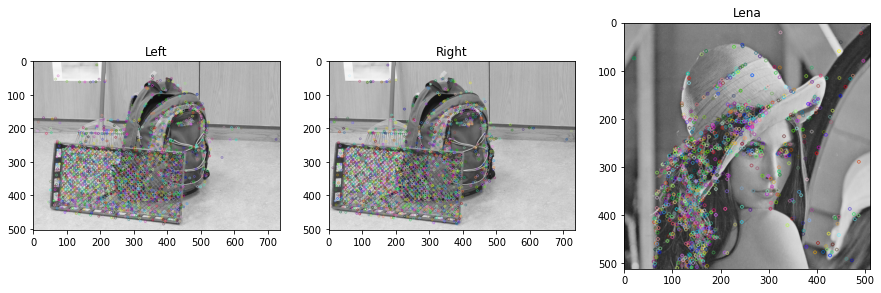

In [2]:
kp1, des1 = my_SIFT_instance.detectAndCompute(left,None)
kp2, des2 = my_SIFT_instance.detectAndCompute(right,None)
kp3, des3 = my_SIFT_instance.detectAndCompute(lena,None)
leftp = cv2.drawKeypoints(left,kp1,left)
rightp = cv2.drawKeypoints(right,kp2,left)
lenap = cv2.drawKeypoints(lena,kp3,lena)
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(leftp)
plt.title('Left')
plt.subplot(1,3,2)
plt.imshow(rightp)
plt.title('Right')
plt.subplot(1,3,3)
plt.imshow(lenap)
plt.title('Lena')

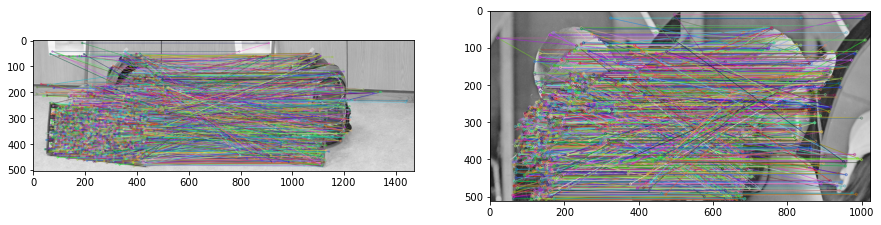

In [3]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)
outputleft = cv2.drawMatchesKnn(left,kp1,right,kp2,matches,None, flags=2)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.imshow(outputleft)
matcheslena = bf.knnMatch(des3,des3, k=2)
outputlena = cv2.drawMatchesKnn(lena,kp3,lena,kp3,matcheslena,None, flags=2)
plt.subplot(1,2,2)
plt.imshow(outputlena)

Lowe’s Ratio Test

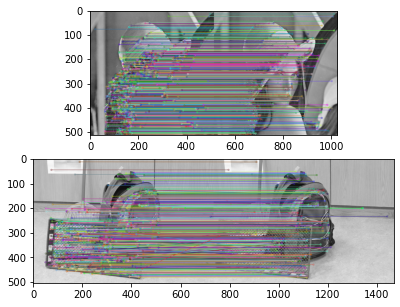

In [4]:
goodbackpack = []
for m,n in matches:
    if(m.distance < 0.75*n.distance):
        goodbackpack.append([m])
goodlena = []
for m,n in matcheslena:
    if(m.distance < 0.75*n.distance):
        goodlena.append([m])
plt.figure(figsize=(20,5))
plt.subplot(2,1,1)
lenaconnect = cv2.drawMatchesKnn(lena,kp3,lena,kp3,goodlena,None,flags=2)
plt.imshow(lenaconnect)
plt.subplot(2,1,2)
backpackconnect = cv2.drawMatchesKnn(left,kp1,right,kp2,goodbackpack,None,flags=2)
plt.imshow(backpackconnect)

Histogram

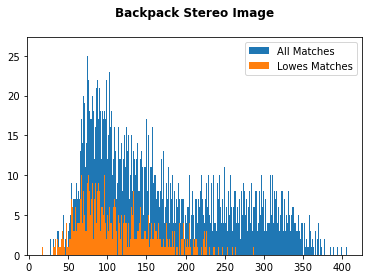

In [5]:
allmatches = []
lowesmatches = []
for m,n in matches:
    if(m.distance < 0.8*n.distance):
        lowesmatches.append(m.distance)
for m,n in matches:
    allmatches.append(m.distance)
plt.hist(allmatches,bins =400, label = 'All Matches')
plt.hist(lowesmatches,bins =400, label = 'Lowes Matches')
plt.title('Backpack Stereo Image\n', fontweight ="bold")
plt.legend()
plt.show()   

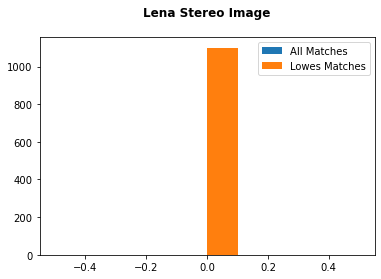

In [6]:
allmatches = []
lowesmatches = []
for m,n in matcheslena:
    if(m.distance < 0.8*n.distance):
        lowesmatches.append(m.distance)
for m,n in matcheslena:
    allmatches.append(m.distance)
plt.hist(allmatches, label = 'All Matches')
plt.hist(lowesmatches, label = 'Lowes Matches')
plt.title('Lena Stereo Image\n', fontweight ="bold")
plt.legend()
plt.show()

Q1    What conclusion can be drawnfrom this histogram?

A     After the Lowe's ratio test, some bad matches are deleted, only the good matches are left，so the counts (the y-axis) becomes smaller. For the backpack, since the difference between the two images is small, after removing the bad matches (with a long distance), the distance difference between the well matched points is small, so the range of the x-axis is significantly shorter and moves slightly to the left. For Lena, because the two pictures are exactly the same, the difference in distance is 0, showing a straight line.